## 0.주제

미세먼지와 다른 기후정보와의 상관관계 분석

## 1.주제선정이유:

요즈음 미세먼지가 날로 심해짐에 의해 사람들은 미세먼지에 관한 관심을 가지고, 예방을 강화하고 있습니다. 미세먼지보다 더 크기가 작고 위협적인 초미세먼지가 등장하면서 약국에서는 초미세먼지를 걸러줄 수 있는 마스크를 개발할 정도로 (초)미세먼지의 위협은 계속되고 있습니다. 특히, 현재 우리가 살고 있는 서울, 경기도 지방은 다른 도시에 비해 열섬현상이 일어나서 미세먼지의 농도가 상대적으로 심함을 체감할 수 있습니다. 이러한 상황에서 저는 열섬현상 이외에 기온, 습도 등 기후정보와도 상관관계가 있는지 의문이 들었고, 이러한 프로젝트를 진행하게 되었습니다.

## 2.가설정의:

경기도에서 두 달 정도 생활하면서 미세먼지가 많은 날을 관찰해본 결과, 낮에는 상대적으로 기온이 높아 미세먼지 농도가 낮고, 밤에는 기온이 낮아 미세먼지가 가라앉으면서 미세먼지 농도가 커짐을 알 수 있었다. 이러한 경험을 바탕으로 미세먼지 농도와 기온과의 상관관계가 존재할 것으로 예상한다. 또한, 습도가 낮은 겨울과 습도가 높은 여름에 비해 비교적 봄철에 미세먼지가 높은 것으로 보아 미세먼지의 농도와 습도와의 상관관계는 없거나 크게 영향을 미치지 않을 것으로 예상한다.

## 3. 인터넷을 통한 데이터 획득:

서울 열린 데이터 광장(http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2218&srvType=S&serviceKind=1&currentPageNo=1)을 통해 서울시 일별 평균 대기오염 정보를 xlsx파일로 다운로드 받는다.
기상자료개방포털(https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36)을 통해 서울시의 종관기상관측을 일별로 다운로드 받는다. 다운로드는 xlsx파일로 받는다.

In [1]:
import pandas as pd
df=pd.read_excel('서울 일별 미세먼지농도.xlsx')
weather=pd.read_excel('seoulweather2019.xlsx')
print(df)
print(weather)

          측정일자  권역명  측정소명  미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)  오존(ppm)  이산화질소농도(ppm)  \
0     20180520  도심권    중구         11           6    0.035         0.021   
1     20180520  도심권   종로구          9           5    0.039         0.015   
2     20180520  도심권   용산구          5           4    0.038         0.010   
3     20180520  서북권   은평구          8           7    0.039         0.011   
4     20180520  서북권  서대문구         10           5    0.038         0.007   
5     20180520  서북권   마포구         12           4    0.037         0.011   
6     20180520  동북권   광진구         10           1    0.031         0.011   
7     20180520  동북권   성동구         14           7    0.033         0.010   
8     20180520  동북권   중랑구          6           4    0.034         0.000   
9     20180520  동북권  동대문구          7           5    0.035         0.020   
10    20180520  동북권   성북구         15           8    0.030         0.017   
11    20180520  동북권   도봉구          9           3    0.032         0.016   
12    20180520  동북권   강북구

##  4.분석을 위한 데이터 가공:

2019년 서울시의 일별 미세먼지와 서울시의 기후와의 상관관계를 비교하고자 한다. 이를 위해 미세먼지가 많은 날과 적은 날의 기준을 잡아야한다. 기준은 미세먼지 농도가 높은 날 휴대폰 메시지로 날아오는 미세먼지 경보 문자를 기준 날로 잡아 이날의 미세먼지 농도를 기준으로 잡고자 한다. 결론부터 말씀드리자면 분석결과 대부분 미세먼지가 50이 넘어가면 미세먼지 경보 메시지가 날아오는 것을 확인하였고, 기준을 50으로 잡았다.

In [2]:
import pandas as pd
df=pd.read_excel('서울 일별 미세먼지농도.xlsx')
content=df[['측정일자','측정소명','초미세먼지(㎍/㎥)']]

data_dictionary={}
highnumber=[]
extract_finedust=[]
not_extract_finedust=[]

j=0
for i in range(len(content)):
    if content['측정소명'][i]=='중구':
        if content['측정일자'][i]>=20190101:
            data_dictionary[content['측정일자'][i]]=content['초미세먼지(㎍/㎥)'][i]
            if content['초미세먼지(㎍/㎥)'][i]>50:
                extract_finedust.append(content['초미세먼지(㎍/㎥)'][i])
                highnumber.append(j)
            else:
                not_extract_finedust.append(content['초미세먼지(㎍/㎥)'][i])
            j+=1

data_finedust=[]
for i in data_dictionary.values():
    data_finedust.append(i)

print(data_dictionary)
print(data_finedust)
print(highnumber)
print(extract_finedust)
print(not_extract_finedust)

{20190101: 26, 20190102: 21, 20190103: 21, 20190104: 37, 20190105: 41, 20190106: 21, 20190107: 31, 20190108: 19, 20190109: 21, 20190110: 29, 20190111: 47, 20190112: 64, 20190113: 70, 20190114: 114, 20190115: 80, 20190116: 17, 20190117: 19, 20190118: 28, 20190119: 58, 20190120: 33, 20190121: 19, 20190122: 26, 20190123: 42, 20190124: 19, 20190125: 18, 20190126: 19, 20190127: 19, 20190128: 21, 20190129: 20, 20190130: 26, 20190131: 20, 20190201: 15, 20190202: 32, 20190203: 24, 20190204: 36, 20190205: 25, 20190206: 31, 20190207: 30, 20190208: 15, 20190209: 16, 20190210: 22, 20190211: 22, 20190212: 34, 20190213: 20, 20190214: 21, 20190215: 26, 20190216: 43, 20190217: 23, 20190218: 23, 20190219: 29, 20190220: 42, 20190221: 58, 20190222: 49, 20190223: 32, 20190224: 40, 20190225: 57, 20190226: 24, 20190227: 39, 20190228: 51, 20190301: 75, 20190302: 76, 20190303: 64, 20190304: 101, 20190305: 124, 20190306: 91, 20190307: 36, 20190308: 23, 20190314: 19, 20190315: 36, 20190318: 21, 20190319: 34, 20

데이터를 가공할 모듈인 pandas를 import 한다. pandas를 pd로 부른다.
df라는 변수로 '서울 일별 미세먼지농도.xlsx 파일을 읽어온다.
위의 데이터 중 쓸데없는 내용을 포함하는 열들을 삭제시켜주고, 원하는 열들만 추출해낸다. '측정일자','측정소명','초미세먼지(㎍/㎥)'을 content라는 변수로 받아서 또다른 dataframe으로 나타낸다.

data를 보기쉽게 dictionary로 만들기 위해 빈 dictionary인 data_dictionary를 만든다.
highnumber란 미세먼지 농도의 기준인 50이 넘어가는 날의 인덱스를 list로 받기 위해 만든 변수다. data_dictionary를 만드는 동안 한꺼번에 만들기 위해 빈 리스트로 만들었다.
extract_finedust는 말 그대로 미세먼지 기준인 50이 넘어갈 때의 미세먼지들을 리스트로 받기 위해 만든 변수이다. highnumber와 같은 방법으로 list를 채우기 위해 빈 리스트로 만들었다. not_extract_finedust는 extract_finedust의 반대의미이다.

반복문을 통해 data_dictionary안에 내용을 채운다. 여기서 j는 highnumber에 채워넣기 위해 만든 임의의 index 숫자이다. 이때 많은 행들 중 서울을 대표하는 구를 '중구'로 잡았고, 2019년만을 나타내기 위해 if함수로 이를 표현하였다. 이후 highnumber와 extract_finedust를 채우기 위해 '초미세먼지(㎍/㎥)'가 50이 넘어갈 때 highnumber와 extract_finedust에 원하는 수를 채워놓도록 하였다. 그리고 else를 활용하여 not_extract_finedust를 채워넣었다.

미세먼지의 값들만 따로 data_finedust라는 리스트로 만들었다. 빈 리스트를 만든 후 반복문을 통해 dictionary의 value값을 리스트 안에 집어넣는다.

In [3]:
weather=pd.read_excel('seoulweather2019.xlsx')
weather=weather[['일시','평균 상대습도(%)','평균기온(°C)','강수 계속시간(hr)']]
extract_date=[]
extract_humidity=[]
extract_temperature=[]
extract_rainfall=[]
for i in highnumber:
    extract_date.append(weather['일시'][i])
    extract_humidity.append(weather['평균 상대습도(%)'][i])
    extract_temperature.append(weather['평균기온(°C)'][i])
    extract_rainfall.append(weather['강수 계속시간(hr)'][i])
extract_data={'date':extract_date,'finedust':extract_finedust,'humidity':extract_humidity,'temperature':extract_temperature,'rainfall':extract_rainfall}
extract_data=pd.DataFrame(extract_data)
extract_data

,date,finedust,humidity,temperature,rainfall
0,2019-01-12,64,47.6,2.8,NaN
1,2019-01-13,70,54.3,1.2,NaN
2,2019-01-14,114,68.6,1.4,NaN
3,2019-01-15,80,58.8,-1.7,1.00
4,2019-01-19,58,59.8,3.6,NaN
5,2019-02-21,58,59.4,2.4,NaN
6,2019-02-25,57,55.8,4.7,NaN
7,2019-02-28,51,39.5,6.6,NaN
8,2019-03-01,75,42.3,6.6,NaN
9,2019-03-02,76,37.6,7.8,NaN


'seoulweather2019.xlsx파일을 'weather'변수로 읽어오고, 원하는 데이터만 가공하기 위해 '일시','평균 상대습도(%)','평균기온(°C)','강수 계속시간(hr)'인 열들만 다시 weather로 읽어온다. 
각각의 열들을 보기 편하게 하기 위해 dataframe으로 만들고자 한다.
각각의 열들을 미세먼지 관련 리스트와 병합하여 다시 dataframe으로 만들기 위해 각각의 열들을 list로 받아오고 이를 pandas(pd)로 구현한다.

In [4]:
lownumber=[]
for i in range(len(data_dictionary)):
    if not i in highnumber:
        lownumber.append(i)
        
not_extract_date=[]
not_extract_humidity=[]
not_extract_temperature=[]
not_extract_rainfall=[]
for i in lownumber:
    not_extract_date.append(weather['일시'][i])
    not_extract_humidity.append(weather['평균 상대습도(%)'][i])
    not_extract_temperature.append(weather['평균기온(°C)'][i])
    not_extract_rainfall.append(weather['강수 계속시간(hr)'][i])
not_extract_data={'date':not_extract_date,'finedust':not_extract_finedust,'humidity':not_extract_humidity,'temperature':not_extract_temperature,'rainfall':not_extract_rainfall}
not_extract_data=pd.DataFrame(not_extract_data)
not_extract_data

,date,finedust,humidity,temperature,rainfall
0,2019-01-01,26,49.5,-5.0,NaN
1,2019-01-02,21,42.8,-4.9,NaN
2,2019-01-03,21,38.8,-3.5,NaN
3,2019-01-04,37,55.5,-1.1,NaN
4,2019-01-05,41,40.3,-2.8,NaN
5,2019-01-06,21,35.0,-2.8,NaN
6,2019-01-07,31,46.4,-1.9,NaN
7,2019-01-08,19,31.0,-3.5,NaN
8,2019-01-09,21,28.8,-4.7,NaN
9,2019-01-10,29,48.8,-0.6,NaN


동일한 방법으로 not_extract_data를 dataframe으로 만든다.

## 5.데이터 비교하기:

#### 5-1 데이터 수치화하기

In [5]:
high_per_humidity=[]
high_per_temperature=[]
high_per_rainfall=[]
for i in range(len(extract_data)):
    high_per_humidity.append(extract_data['humidity'][i]/extract_data['finedust'][i])
    high_per_temperature.append(extract_data['temperature'][i]/extract_data['finedust'][i])
    high_per_rainfall.append(extract_data['rainfall'][i]/extract_data['finedust'][i])
print(high_per_humidity)
print(high_per_temperature)
print(high_per_rainfall)

low_per_humidity=[]
low_per_temperature=[]
low_per_rainfall=[]
for i in range(len(not_extract_data)):
    low_per_humidity.append(not_extract_data['humidity'][i]/not_extract_data['finedust'][i])
    low_per_temperature.append(not_extract_data['temperature'][i]/not_extract_data['finedust'][i])
    low_per_rainfall.append(not_extract_data['rainfall'][i]/not_extract_data['finedust'][i])
print(low_per_humidity)
print(low_per_temperature)
print(low_per_rainfall)

[0.74375, 0.7757142857142857, 0.6017543859649123, 0.735, 1.0310344827586206, 1.0241379310344827, 0.9789473684210526, 0.7745098039215687, 0.564, 0.4947368421052632, 0.56875, 0.45643564356435645, 0.5346774193548387, 0.6043956043956044, 0.5833333333333334, 1.031372549019608]
[0.04375, 0.017142857142857144, 0.012280701754385965, -0.021249999999999998, 0.06206896551724138, 0.041379310344827586, 0.0824561403508772, 0.12941176470588234, 0.088, 0.10263157894736842, 0.146875, 0.09801980198019802, 0.06774193548387097, 0.09230769230769231, 0.05303030303030303, 0.22745098039215686]
[nan, nan, nan, 0.0125, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.008787878787878787, nan]
[1.9038461538461537, 2.038095238095238, 1.8476190476190475, 1.5, 0.9829268292682927, 1.6666666666666667, 1.4967741935483871, 1.631578947368421, 1.3714285714285714, 1.682758620689655, 1.251063829787234, 2.6999999999999997, 2.4105263157894736, 1.5714285714285714, 1.1666666666666667, 3.0421052631578944, 2.3846153846153846, 

finedust와 나머지 열들의 상관관계를 비교하기 위해 먼저 humidity, temperature, rainfall을 finedust로 나눠준다. 그것을 리스트로 받는다.이때 rainfall 같은 경우는 비가 오지 않는 날을 nan으로 표시했다.

In [6]:
import numpy as np
def probability_rainfall_nan(rainfall,rainfall_list):
    for i in rainfall:
        if np.isnan(i):
            rainfall_list.append(i)
    probability=len(rainfall_list)/len(rainfall)*100
    return probability
high_rainfall_list=[]
low_rainfall_list=[]
print(probability_rainfall_nan(high_per_rainfall,high_rainfall_list))
print(probability_rainfall_nan(low_per_rainfall,low_rainfall_list))

87.5
68.96551724137932


rainfall같은 경우 수치적 관계를 비교하기 보다는 비가 온 날과 안 온 날일 때의 finedust량을 비교하는 것이 낫다고 생각하여 finedust의 기준이 50 넘을 때와 안넘을 때의 비가 올 확률을 계산하였다. 이때 numpy모듈을 이용하였다.

위의 결과를 보면 알겠지만 finedust의 기준이 넘어갈 때 비가 오지 않을 확률은 87.5%이고, 기준이 넘어가지 않을 때 비가 오지 않을 확률은 대략 69%였다.
따라서 이를 통해 강수량과 미세먼지 농도의 상관관계를 비교하는 것을 어렵다고 판단하였고, 굳이 상관관계를 비교하자면 이는 그리 크지 않다는 결론을 지었다.

#### 5-2 데이터 표현하기

himidity와 finedust, 그리고 temperature과 finedust의 상관관계를 비교하기 위해 먼저 2차원 평면에다가 위에서 계산한 수치들을 대입해보기로 하였다. 이때 matplotlib.pyplot라는 모듈을 활용하였다.

In [7]:
import matplotlib.pyplot as plt
plt.scatter(extract_data['finedust'],extract_data['humidity'],label='high__finedust_humidity',color='b')
plt.scatter(extract_data['finedust'],extract_data['temperature'],label='high_finedust_temperature',color='r')
plt.scatter(not_extract_data['finedust'],not_extract_data['humidity'],label='low_finedust_humidity',color='m')
plt.scatter(not_extract_data['finedust'],not_extract_data['temperature'],label='low_finedust_temperature',color='g')

plt.xlabel('finedust')
plt.title('correlation about finedust')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

위의 점들은 finedust에 대한 humidity와 temperature을 2차원 평면에 표현한 것이다. humidity와 temperature을 각각 finedust와 비교하기 위해 위에서 이미 수치화하였고, 이를 다시 한 번 2차원 평면에 나타내 보았다.

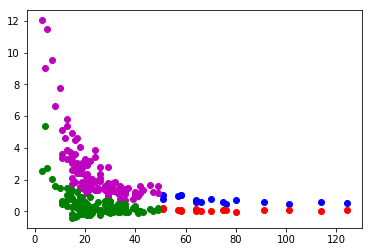

In [8]:
x1=extract_data['finedust']
x2=not_extract_data['finedust']
y1=high_per_humidity
y2=high_per_temperature
y3=low_per_humidity
y4=low_per_temperature

plt.plot(x1,y1,'bo')
plt.plot(x1,y2,'ro')
plt.plot(x2,y3,'mo')
plt.plot(x2,y4,'go')
plt.show()

## 6. 분석 결과 도출하기:

위와 같은 그래프를 보고, 이에 대해 최소제곱오차를 통해 최적근사함수를 표현하려고 하였다. 하지만, 구글링을 통해 공부해본 결과 이를 실현시키기 위해선 딥러닝을 해야한다는 것을 알았고, 나의 실력은 아직 그 정도 수준에 미치지 못하는 것 같아 다른 방법을 강구해보았다.

그래서 그래프의 개형을 먼저 잡고 거기에 들어갈 변수들을 최소제곱근사를 통해 구하기로 하였다. 먼저 그래프의 개형을 y=a/x + b, 즉 a+bx=xy로 잡고 a와 b에 대한 행렬을 만들기로 하였다. 여기서 개형을 잡을 때 high_humidity와 low_humidity, 그리고 high_temperature과 low_temperature을 합쳐서 생각하기로 하였고, 결국 미세먼지의 기준을 세운 것을 포기하기로 결정하였다.

In [9]:
humidity_matrix=[]
for i in range(len(x1)):
    humidity_matrix.append([x1[i],y1[i]])
for i in range(len(x1)):
    humidity_matrix.append([x1[i],y2[i]])
temperature_matrix=[]
for i in range(len(x2)):
    temperature_matrix.append([x2[i],y3[i]])
for i in range(len(x2)):
    temperature_matrix.append([x2[i],y4[i]])
print(humidity_matrix)
print(temperature_matrix)

[[64, 0.74375], [70, 0.7757142857142857], [114, 0.6017543859649123], [80, 0.735], [58, 1.0310344827586206], [58, 1.0241379310344827], [57, 0.9789473684210526], [51, 0.7745098039215687], [75, 0.564], [76, 0.4947368421052632], [64, 0.56875], [101, 0.45643564356435645], [124, 0.5346774193548387], [91, 0.6043956043956044], [66, 0.5833333333333334], [51, 1.031372549019608], [64, 0.04375], [70, 0.017142857142857144], [114, 0.012280701754385965], [80, -0.021249999999999998], [58, 0.06206896551724138], [58, 0.041379310344827586], [57, 0.0824561403508772], [51, 0.12941176470588234], [75, 0.088], [76, 0.10263157894736842], [64, 0.146875], [101, 0.09801980198019802], [124, 0.06774193548387097], [91, 0.09230769230769231], [66, 0.05303030303030303], [51, 0.22745098039215686]]
[[26, 1.9038461538461537], [21, 2.038095238095238], [21, 1.8476190476190475], [37, 1.5], [41, 0.9829268292682927], [21, 1.6666666666666667], [31, 1.4967741935483871], [19, 1.631578947368421], [21, 1.3714285714285714], [29, 1.6

이후 선형대수 시간 때 배운 지식을 활용하여 최소제곱근사를 통한 해를 구하기 위해 class를 만들었다. class 내에 있는 함수는 각각 행렬을 가역으로 만들기 위해 행렬 앞에 행렬의 transpose를 곱하게 하는 함수(reversible)와 역행렬을 구하는 함수(inverse), 그리고 reversible을 하는 과정에서 transpose를 양변에 곱해주기 때문에 우변에도 똑같은 행위를 해주기 위해 만들어진(A의 transpose와 b를 곱하게 해주는) 함수(transpose_multiply)가 있다.

In [10]:
class approximation:
    def reversible(self,List):
        List=np.array(List,ndmin=1)
        List_transpose=List.T
        List_convertion=np.dot(List_transpose,List)
        return List_convertion
    
    def inverse(self,List):
        List=np.array(List,ndmin=1)
        List_inverse=np.linalg.inv(List)
        return List_inverse    
    
    def transpose_multiply(self,List1,List2):
        List1=np.array(List1,ndmin=1)
        List2=np.array(List2,ndmin=1)
        List_multiply=np.dot(List1.T,List2)
        return List_multiply

이후 humidity, temperature에 대해 행렬 A를 만들었다. 행렬 A의 경우 a+bx=xy이기 때문에 [1,x][[a],[b]]=[xy]로 잡았다. 그리고 행렬 A를 가역시켜 계산해주기 위해 transpose시켜 곱했다. 이후 이를 역행렬로 만들어 'A의 transpose와 b의 곱'과 곱해줌으로써 최소제곱근사의 해를 구하려고 시도하였다.

In [11]:
A1_matrix=[]
b1_matrix=[]
for i in range(len(humidity_matrix)):
    A1_matrix.append([1,humidity_matrix[i][0]])
    b1_matrix.append([humidity_matrix[i][0]*humidity_matrix[i][1]])
    
A2_matrix=[]
b2_matrix=[]
for i in range(len(temperature_matrix)):
    A2_matrix.append([1,temperature_matrix[i][0]])
    b2_matrix.append([temperature_matrix[i][0]*temperature_matrix[i][1]])

A1_reversible=approximation().reversible(A1_matrix)
A2_reversible=approximation().reversible(A2_matrix)

A1_inverse=approximation().inverse(A1_reversible)
A2_inverse=approximation().inverse(A2_reversible)

B1_matrix=approximation().transpose_multiply(A1_matrix,b1_matrix)
B2_matrix=approximation().transpose_multiply(A2_matrix,b2_matrix)

A1_root=np.dot(A1_inverse,B1_matrix)
A2_root=np.dot(A2_inverse,B2_matrix)


print(A1_root)
print(A2_root)

[[19.97951456]
 [ 0.11077314]]
[[ 2.69898091e+01]
 [-8.97992552e-03]]


값들을 각각 생각해놓았던 개형의 a,b값에 대입시켜줌으로써 humidity와 finedust, 그리고 temperature과 finedust와의 상관관계를 찾을 수 있었다.
정리하자면 humidity와 finedust는 finedust를 x축에, humidity/finedust를 y축에 각각 대입했을 때 y=19.97951456/x + 0.11077314 이라는 관계식을 발견할 수 있었고, temperature과 finedust는 finedust를 x축에, temperature를 y축에 각각 대입했을 때 y=2.69898091e+01/x + -8.97992552e-03이라는 관계식을 얻을 수 있었다. 이를 다시 정리하면 humidity=19.97951456 + 0.11077314 * finedust , temperature = 2.69898091e+01/x + -(-8.97992552e-03) * finedust이다.

## 7. 결론

미세먼지와 여러가지 기후정보와의 상관관계를 분석해본 결과 강수량은 비가 오지 않는 날이 많았기 때문에 상관관계를 고려하기 쉽지않았고, 습도나 온도 같은 경우는 미세먼지와 상관관계가 있음을 확인할 수 있었다. 하지만, 습도와 온도를 미세먼지와 비교하기 위해 임의로 습도와 온도를 미세먼지로 나눈 후 이를 미세먼지의 데이터와 비교하므로써 정석적인 최소제곱오차를 사용하지 않았다. 이로 인해 오차가 발생하였을 것이다. 하지만, 이러한 방법을 택하여 y=a/x+b라는 임의의 개형을 발견해냄으로써 미리 계획하고 있던 최소제곱오차를 행렬에 관해 풀 수 있었다. 그러므로 비록 편법에 해당하지만 기후정보와 미세먼지 간의 상관관계를 찾았다는 결론을 이끌 수 있다.

## 8. 참고문헌

1. pandas의 기초를 가르쳐 준 사이트(https://3months.tistory.com/292)
2. pandas 설치 방법(https://m.blog.naver.com/PostView.nhn?blogId=veritas3012&logNo=221226261724&proxyReferer=https%3A%2F%2Fwww.google.com%2F)
3. 최소제곱함수를 사용하기 위한 사이트(https://hamait.tistory.com/747),(https://wikidocs.net/15656),(https://techreviewtips.blogspot.com/2018/08/05-04-1-python-matrix-multiplication.html),(http://blog.naver.com/PostView.nhn?blogId=lyshyn&logNo=221074812470&parentCategoryNo=&categoryNo=78&viewDate=&isShowPopularPosts=true&from=search)(http://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221138003878)
4. 오류를 고쳐주기 위한 사이트 (http://blog.naver.com/PostView.nhn?blogId=redpkzo&logNo=30147779345)